In [ ]:
#!pip install pandas numpy matplotlib seaborn jupyter 

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.6 MB 15.2 MB/s eta 0:00:01
   ----------------------- ---------------- 7.3/12.6 MB 18.1 MB/s eta 0:00:01
   ------------------------------------

In [ ]:
# Importing libraries

import pandas as pd #Essential for working with DataFrames, which are the primary way we'll handle our data.
import numpy as np # Provides support for numerical operations.
import seaborn as sns # We'll use it to create visualizations
import matplotlib.pyplot as plt # It makes creating statistically informative and visually appealing plots easier.

In [4]:
# Loading the dataset
try:
    data = pd.read_csv("stroke_risk_dataset.csv")
except FileNotFoundError:
    print("Error: Dataset not found. Check the path.")
    exit()    

In [5]:
# Initial Inspections

print(data.head()) # View the first rows
print(data.info()) # Data types and missing values
print(data.describe()) # Summary Statistics


   Chest Pain  Shortness of Breath  Irregular Heartbeat  Fatigue & Weakness  \
0           0                    1                    1                   1   
1           0                    0                    1                   0   
2           1                    0                    0                   1   
3           1                    0                    1                   1   
4           0                    0                    1                   0   

   Dizziness  Swelling (Edema)  Pain in Neck/Jaw/Shoulder/Back  \
0          0                 0                               0   
1          0                 1                               0   
2          1                 1                               0   
3          0                 1                               1   
4          0                 1                               0   

   Excessive Sweating  Persistent Cough  Nausea/Vomiting  High Blood Pressure  \
0                   1                 1        

In [6]:
# Check for missing values
print(data.isnull().sum())

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64


In [7]:
# Convert to boolean
data['At Risk (Binary)'] = data['At Risk (Binary)'].astype(bool)

In [8]:
symptoms = ['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat', 'Fatigue & Weakness',
            'Dizziness', 'Swelling (Edema)', 'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
            'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure', 'Chest Discomfort (Activity)',
            'Cold Hands/Feet', 'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom']

data['Symptom Score'] = data[symptoms].sum(axis=1) # Sum of present symptoms

Text(0.5, 1.0, 'Distribution of Stroke Risk (%)')

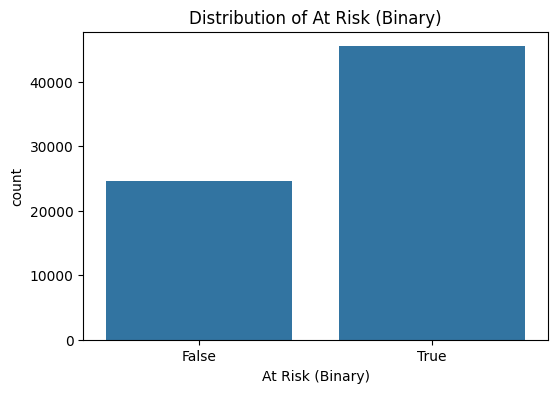

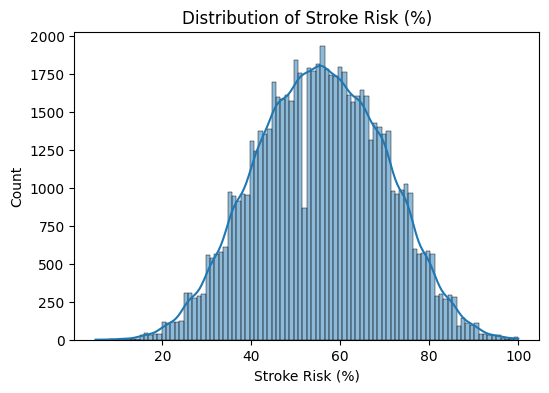

In [11]:
# Target Variable Distribution:  Understand the distribution of your target variables.
plt.figure(figsize=(6, 4))
sns.countplot(x='At Risk (Binary)', data=data)
plt.title('Distribution of At Risk (Binary)')

plt.figure(figsize=(6, 4))
sns.histplot(data['Stroke Risk (%)'], kde=True) # kde adds a density curve
plt.title('Distribution of Stroke Risk (%)')


Text(0.5, 1.0, 'Symptom Score Distribution')

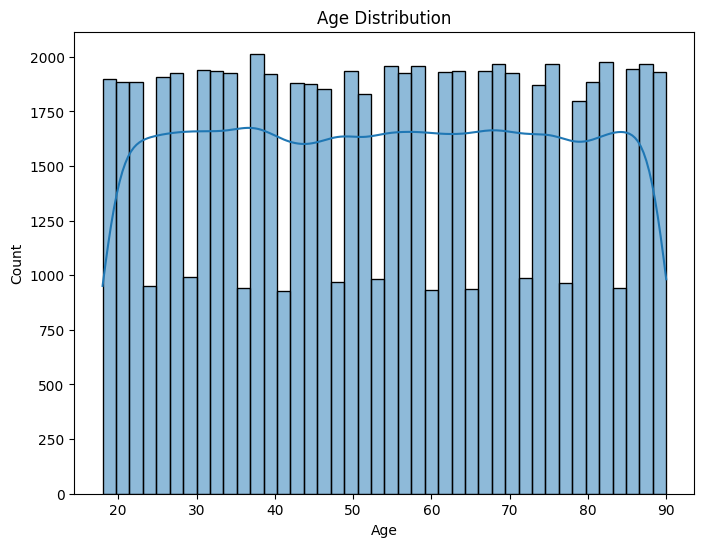

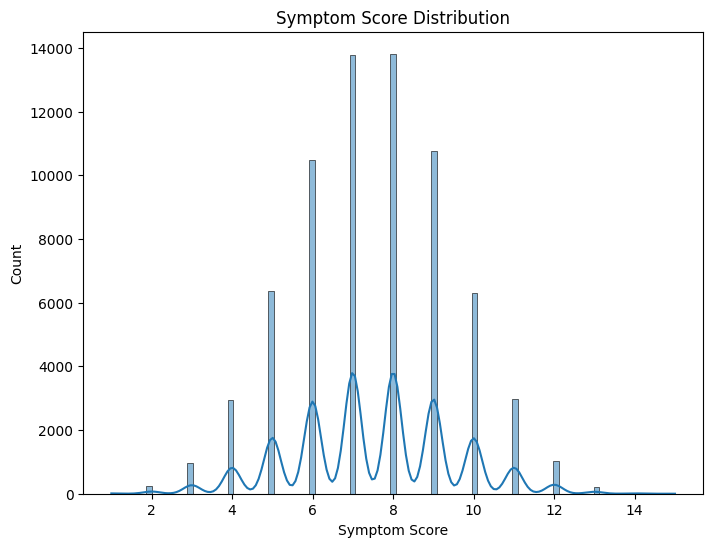

In [12]:
#Numerical Features (Age, Symptom Score): Examine the distribution of numerical features.

plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(8, 6))
sns.histplot(data['Symptom Score'], kde=True)
plt.title('Symptom Score Distribution')

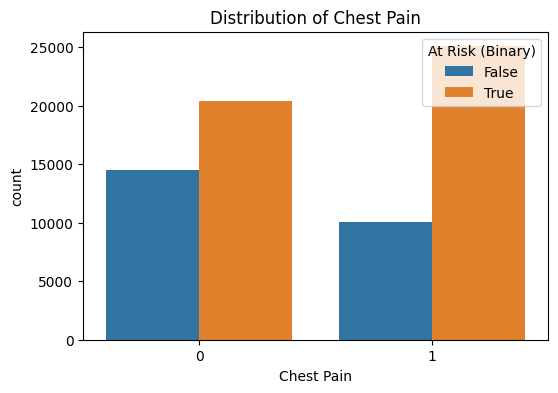

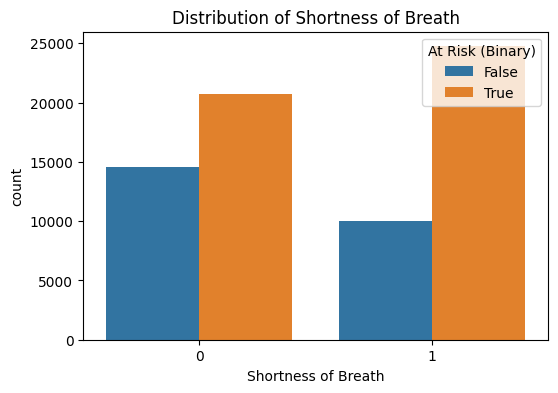

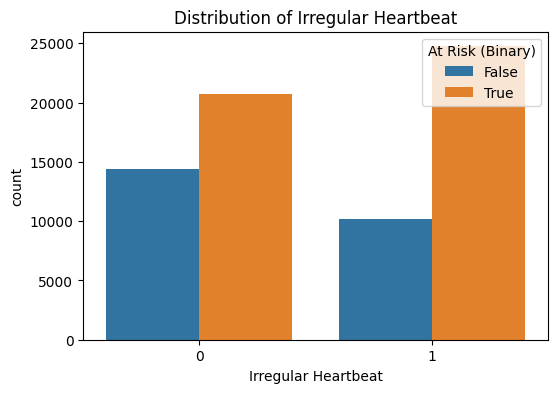

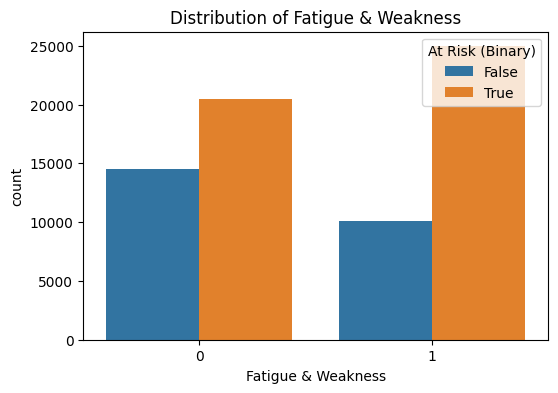

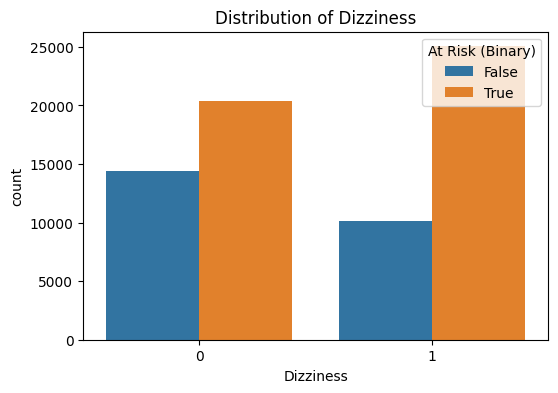

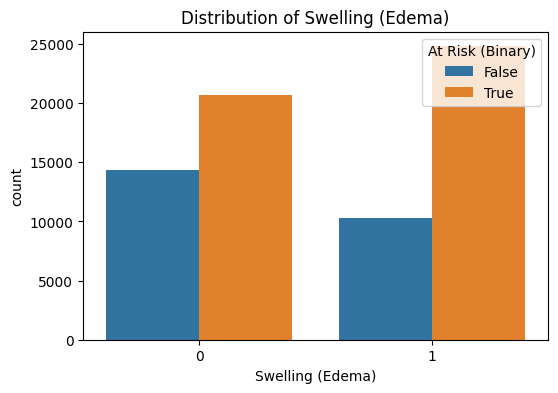

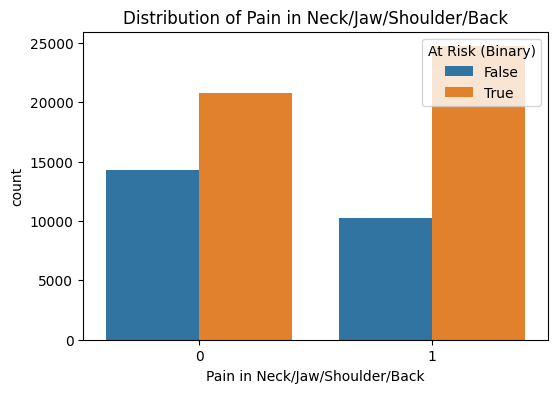

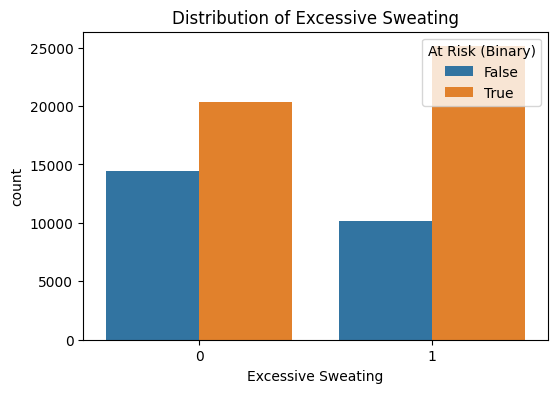

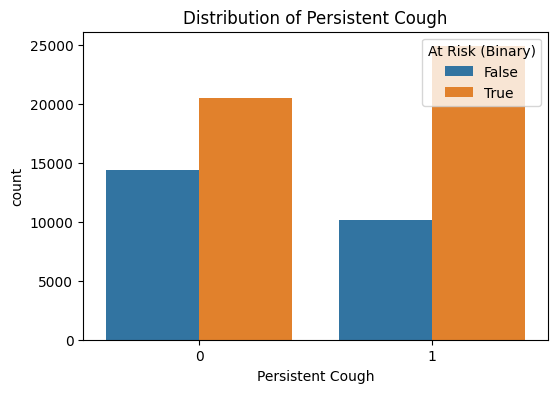

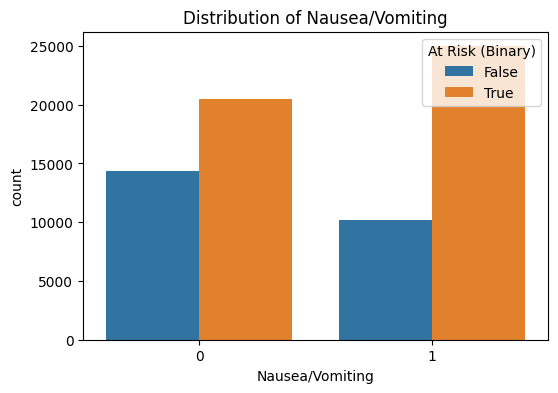

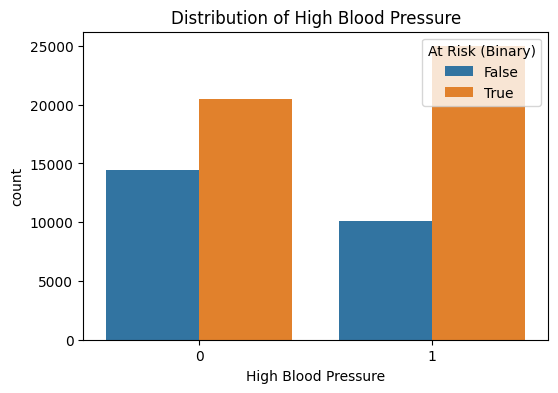

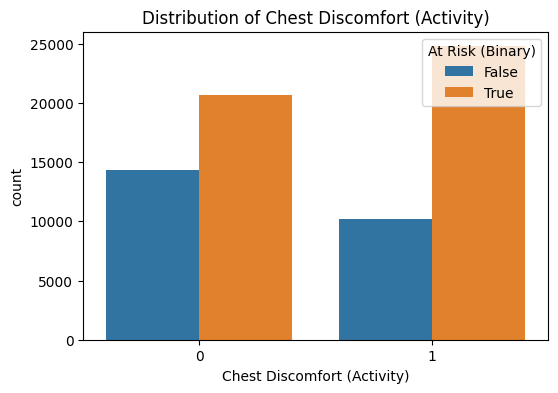

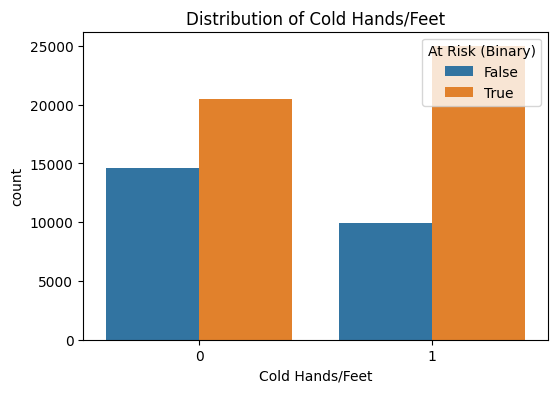

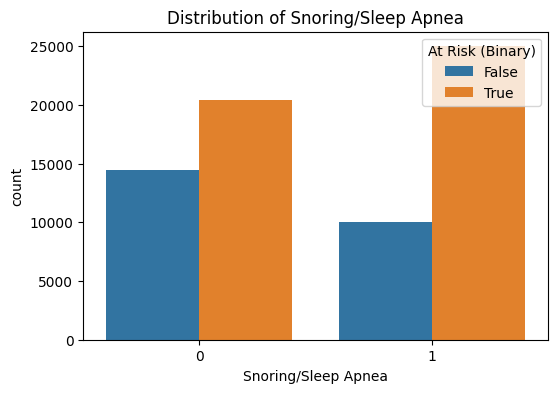

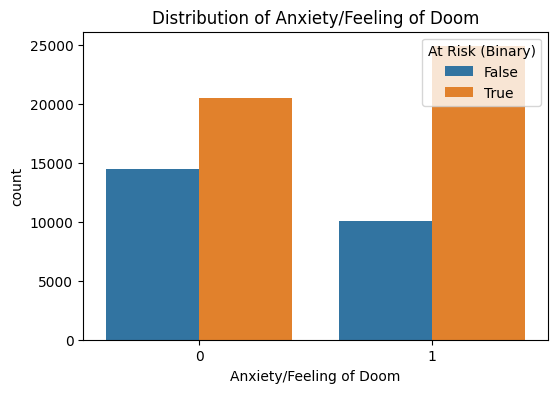

In [13]:
# Categorical Features (Symptoms):  For the individual symptom columns, use count plots.
for symptom in symptoms:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=symptom, data=data, hue='At Risk (Binary)') # Hue shows relationship with target
    plt.title(f'Distribution of {symptom}')

Correlation between Age and Stroke Risk: 0.7338618412768156


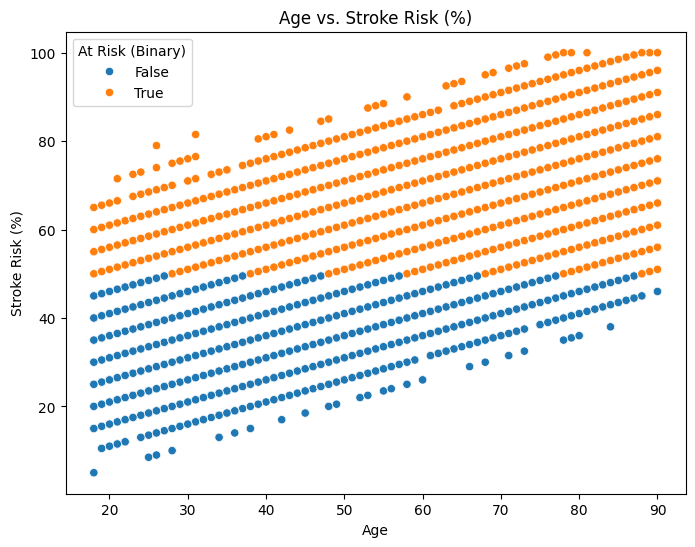

In [15]:
# Numerical vs. Numerical (Age vs. Stroke Risk (%)): Use scatter plots and correlation analysis.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Stroke Risk (%)', data=data, hue='At Risk (Binary)')
plt.title('Age vs. Stroke Risk (%)')

correlation = data['Age'].corr(data['Stroke Risk (%)'])
print(f"Correlation between Age and Stroke Risk: {correlation}") # Print the correlation value


Text(0.5, 1.0, 'Symptom Score vs At Risk')

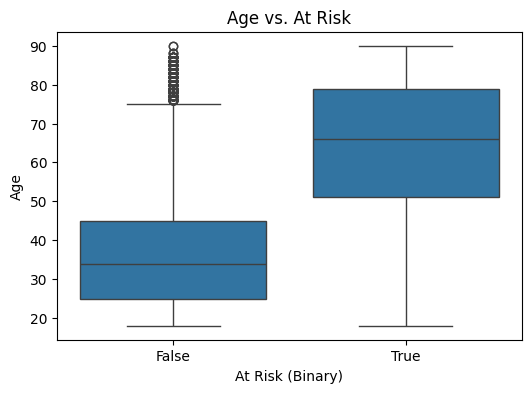

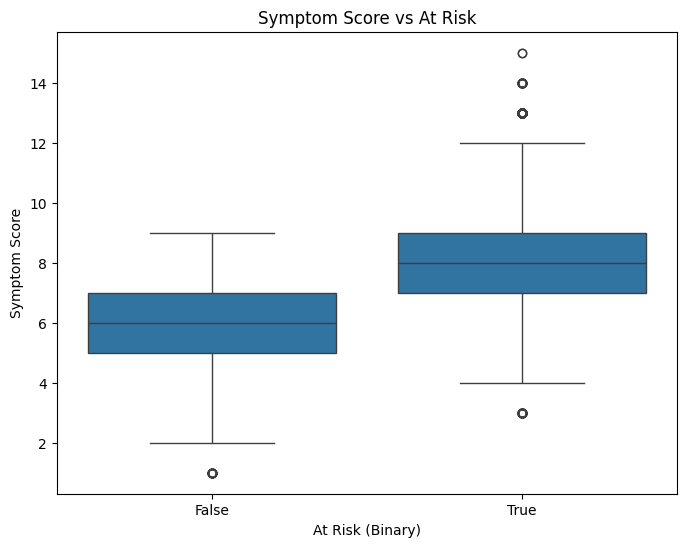

In [16]:
# Numerical vs. Categorical (Age vs. At Risk, Symptom Score vs. At Risk): Use box plots or violin plots.
plt.figure(figsize=(6, 4))
sns.boxplot(x='At Risk (Binary)', y='Age', data=data)
plt.title('Age vs. At Risk')

plt.figure(figsize = (8,6))
sns.boxplot(x = "At Risk (Binary)", y = "Symptom Score", data = data)
plt.title("Symptom Score vs At Risk")
